In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
keras = tf.keras
from scipy import stats
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

pd.set_option('display.max_columns', None)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'large'

In [19]:
X_train = pd.read_csv('../data/train_clean.csv').drop(columns='Unnamed: 0')
X_test = pd.read_csv('../data/test_clean.csv').drop(columns='Unnamed: 0')

In [20]:
X_train.Date = pd.to_datetime(X_train.Date)
X_test.Date = pd.to_datetime(X_test.Date)

In [21]:
X_train = X_train[['Date','Store','Weekly_Sales']]
X_test = X_test[['Date','Store','Weekly_Sales']]

In [22]:
X_train

,Date,Store,Weekly_Sales
0,2010-02-05,1,1643690.90
1,2010-02-12,1,1641957.44
2,2010-02-19,1,1611968.17
3,2010-02-26,1,1409727.59
4,2010-03-05,1,1554806.68
...,...,...,...
5143,2012-09-28,45,713173.95
5144,2012-10-05,45,733455.07
5145,2012-10-12,45,734464.36
5146,2012-10-19,45,718125.53


In [94]:
s1 = X_test[X_test['Store']==44].copy()
s1 = s1[['Date','Weekly_Sales']]
s1.columns = ['ds', 'y']
s1_train = s1.drop(s1.index[-10:], axis=0)
s1_test = s1[-10:].copy()
future = s1_test[['ds']].copy()

In [95]:
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
h_dates = ['12-Feb-2010', '11-Feb-2011', '10-Feb-2012',
           '10-Sep-2010', '9-Sep-2011', '7-Sep-2012',
           '26-Nov-2010', '25-Nov-2011', '23-Nov-2012',
           '31-Dec-2010', '30-Dec-2011', '28-Dec-2012']
hol = ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas']
h_labels = []
for h in hol:
    h_labels.extend([h]*3)
h_labels
holidays=pd.DataFrame({'holiday': h_labels, 'ds': h_dates})
holidays

,holiday,ds
0,Super Bowl,12-Feb-2010
1,Super Bowl,11-Feb-2011
2,Super Bowl,10-Feb-2012
3,Labor Day,10-Sep-2010
4,Labor Day,9-Sep-2011
5,Labor Day,7-Sep-2012
6,Thanksgiving,26-Nov-2010
7,Thanksgiving,25-Nov-2011
8,Thanksgiving,23-Nov-2012
9,Christmas,31-Dec-2010


In [96]:
model = Prophet(yearly_seasonality=True, holidays=holidays)
model.fit(s1_train)
forecast = model.predict(future)
y_pred = forecast['yhat'].values
y_true = s1_test['y'].copy()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [97]:
s1_train

,ds,y
1144,2010-02-05,281090.95
1145,2010-02-12,286857.13
1146,2010-02-19,267956.30
1147,2010-02-26,273079.07
1148,2010-03-05,284617.27
...,...,...
1272,2012-07-20,337819.16
1273,2012-07-27,319855.26
1274,2012-08-03,342385.38
1275,2012-08-10,333594.81


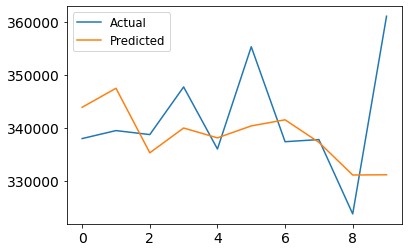

In [98]:
plt.plot(y_true.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

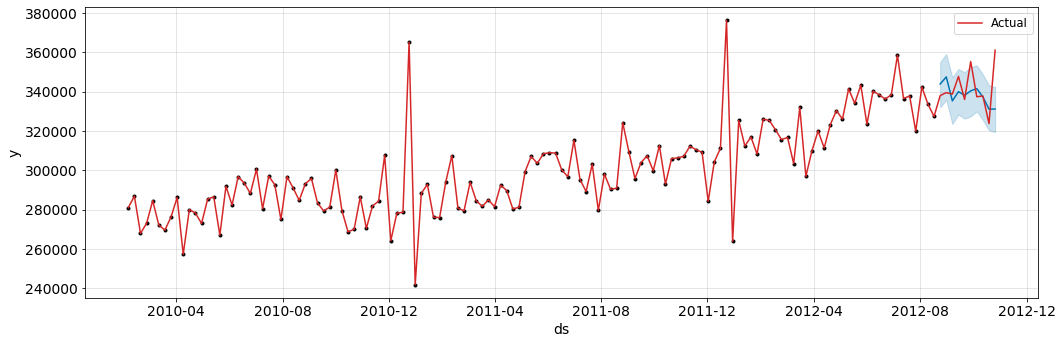

In [99]:
fig, ax = plt.subplots(figsize=(15,5))
model.plot(forecast, ax=ax)
ax.plot(s1['ds'],s1['y'] , label='Actual', color='tab:red')
ax.legend();

In [100]:
mean_absolute_percentage_error(y_true.values, y_pred)

0.024103539132516432